In [1]:
# Метод Бонферрони (поправка Бонферрони):

import pandas as pd
# подготавливаем данные
report = pd.DataFrame()
report['m'] = pd.Series([2, 3, 4, 5, 6, 7, 8, 9, 10, 1000]) # число тестов
report['alpha'] = 0.05 # исходный уровень значимости


# считаем поправку
report['alpha_bonf'] = report['alpha'] / report['m'] 
# считаем FWER
report['fwer_bonf'] = 1 - (1 - report['alpha_bonf']) ** report['m'] 
print(report)


      m  alpha  alpha_bonf  fwer_bonf
0     2   0.05    0.025000   0.049375
1     3   0.05    0.016667   0.049171
2     4   0.05    0.012500   0.049070
3     5   0.05    0.010000   0.049010
4     6   0.05    0.008333   0.048970
5     7   0.05    0.007143   0.048941
6     8   0.05    0.006250   0.048920
7     9   0.05    0.005556   0.048903
8    10   0.05    0.005000   0.048890
9  1000   0.05    0.000050   0.048772


In [3]:
# уровень значимости после коррекции Шидака
import pandas as pd

# подготавливаем данные
report = pd.DataFrame()
report['m'] = pd.Series([2, 3, 4, 5, 6, 7, 8, 9, 10]) # число тестов
report['alpha'] = 0.05 # исходный уровень значимости

# считаем поправку
report['alpha_sidak'] = 1 - (1 - report['alpha']) ** (1 / report['m']) # расчёт коррекции уровня значимости здесь

# считаем FWER
report['fwer_sidak'] = 1 - (1 - report['alpha_sidak']) ** report['m']

print(report)


    m  alpha  alpha_sidak  fwer_sidak
0   2   0.05     0.025321        0.05
1   3   0.05     0.016952        0.05
2   4   0.05     0.012741        0.05
3   5   0.05     0.010206        0.05
4   6   0.05     0.008512        0.05
5   7   0.05     0.007301        0.05
6   8   0.05     0.006391        0.05
7   9   0.05     0.005683        0.05
8  10   0.05     0.005116        0.05


In [4]:
#  вариант с поправкой Холма / Метод Холма
m, alpha = 3, 0.05 # число тестов и уровень значимости
result = []
for i in range(m): # получаем номер текущего теста и считаем коррекцию 
    result += [alpha / (m - i)]
print(result)

[0.016666666666666666, 0.025, 0.05]


коррекция уровня значимости по методу Холма даёт более высокие значения скорректированных уровней значимости, чем при применении методов Бонферрони и Шидака. Это позволяет одновременно и понизить FWER, и повысить мощность теста

Наверняка вы заметили, что в предыдущих примерах для двух тестов и поправка Бонферрони и поправка Шидака давали нам один и тот же уровень значимости, равный 0.025. Да и поправка Холма возвращала сопоставимый результат. Какой же метод коррекции выбирать на практике? Давайте разберёмся. Для этого построим графики зависимости результатов коррекции от числа тестов:



    m  alpha  Метод Бонферрони  Метод Шидака  \
0   2   0.05          0.025000      0.025321   
1   3   0.05          0.016667      0.016952   
2   4   0.05          0.012500      0.012741   
3   5   0.05          0.010000      0.010206   
4   6   0.05          0.008333      0.008512   
5   7   0.05          0.007143      0.007301   
6   8   0.05          0.006250      0.006391   
7   9   0.05          0.005556      0.005683   
8  10   0.05          0.005000      0.005116   

                                      Поправки Холма  \
0                                      [0.025, 0.05]   
1                [0.016666666666666666, 0.025, 0.05]   
2        [0.0125, 0.016666666666666666, 0.025, 0.05]   
3  [0.01, 0.0125, 0.016666666666666666, 0.025, 0.05]   
4  [0.008333333333333333, 0.01, 0.0125, 0.0166666...   
5  [0.0071428571428571435, 0.008333333333333333, ...   
6  [0.00625, 0.0071428571428571435, 0.00833333333...   
7  [0.005555555555555556, 0.00625, 0.007142857142...   
8  [0.005, 0.00

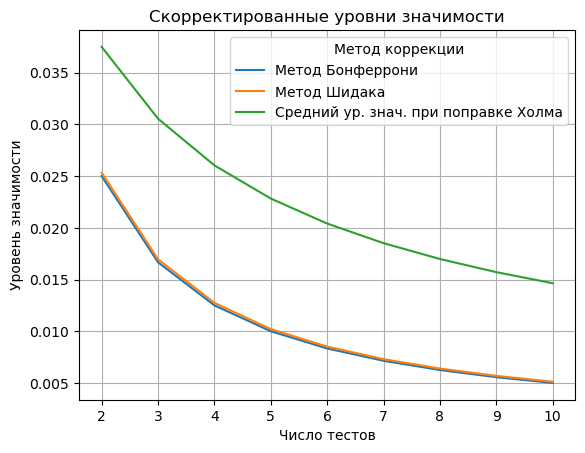

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

   
# подготавливаем данные
report = pd.DataFrame()
report['m'] = pd.Series([2, 3, 4, 5, 6, 7, 8, 9, 10]) # число тестов
report['alpha'] = 0.05 # исходный уровень значимости

# считаем поправки
report['Метод Бонферрони'] = report['alpha'] / report['m'] 
report['Метод Шидака'] = 1 - (1 - report['alpha']) ** (1 / report['m'])

# рассчитываем поправку Холма
def holm_correction(row):
    m, alpha = int(row['m']), row['alpha'] # число тестов и уровень значимости
    result = []
    for i in range(m): # получаем номер текущего теста и считаем коррекцию 
        result += [alpha / (m - i)]
    return result

# поскольку поправка Холма возвращает много результатов - возьмём среднее по ним
report['Поправки Холма'] = report.apply(holm_correction, axis=1)
report['Средний ур. знач. при поправке Холма'] = report['Поправки Холма'].apply(np.mean) # считаем средний уровень значимости с учётом поправки Холма
print(report)

# строим график
report.set_index('m')[['Метод Бонферрони', 'Метод Шидака', 'Средний ур. знач. при поправке Холма']].plot(grid=True)
    
# подписываем оси
plt.xlabel('Число тестов'), plt.ylabel('Уровень значимости')
plt.legend(title = 'Метод коррекции'), plt.title('Скорректированные уровни значимости')
plt.show()


Какой вывод можно сделать по полученному графику? от С увеличением числа сравнений скорректированный уровень значимости падает.
Верно! С ростом числа сравнений от 2 до 10 скорректированный уровень значимости постепенно уменьшается и стремится к 0.


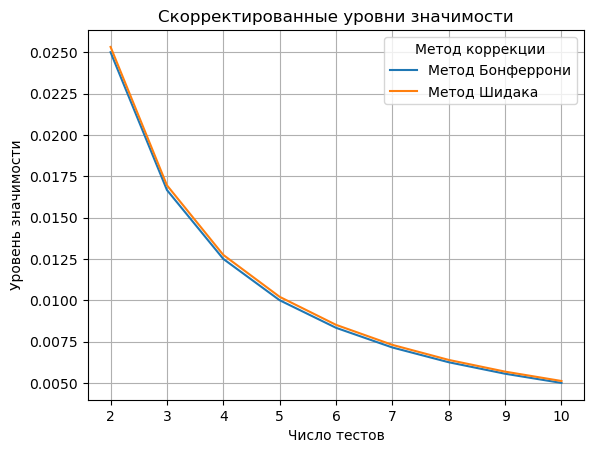

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

   
# подготавливаем данные
report = pd.DataFrame()
report['m'] = pd.Series([2, 3, 4, 5, 6, 7, 8, 9, 10]) # число тестов
report['alpha'] = 0.05 # исходный уровень значимости

# считаем поправки
report['Метод Бонферрони'] = report['alpha'] / report['m'] 
report['Метод Шидака'] = 1 - (1 - report['alpha']) ** (1 / report['m'])

# строим график
report.set_index('m')[['Метод Бонферрони', 'Метод Шидака']].plot(grid=True)
    
# подписываем оси
plt.xlabel('Число тестов'), plt.ylabel('Уровень значимости')
plt.legend(title = 'Метод коррекции'), plt.title('Скорректированные уровни значимости')
plt.show()


по результатам сравнения получается, что методы Бонферрони и Шидака эквиваленты. Значит, можно использовать любой из них.

**специальные тесты для множественного сравнения гипотез:**
 - ANOVA — аналог t-теста для ситуаций сравнения трёх и более выборок;
 - χ2-тест (читается «хи-квадрат») на независимость для сравнения пропорций, долей и шагов воронок — аналог z-теста для пропорций. С z-тестом вы познакомитесь в следующей теме. Обратите внимание, что существует целое семейство тестов χ2, использующихся для самых разных целей. Для сравнения пропорций используется только тест на независимость (test of independence/association);
 - Тест Краскела-Уоллиса — аналог теста Манна-Уитни для ситуации множественных сравнений. 
 - тест Манна-Уитни 


# Поправки на множественную проверку гипотез. Практика


In [16]:
import pandas as pd
from scipy import stats
# загружаем и готовим данные
data = pd.read_csv('https://code.s3.yandex.net/datasets/multitesting.csv')
data.head()

,test,a,b
0,Тест №1,639;648;380;269;517;593;361;210;480;413;566;32...,714;673;1354;169;466;332;554;307;207;398;1025;...
1,Тест №2,596;564;695;670;772;500;365;759;282;465;267;50...,883;819;789;243;484;552;210;145;710;817;806;71...
2,Тест №3,525;594;398;592;787;666;362;865;361;695;906;94...,649;556;520;530;739;582;667;297;480;434;540;96...
3,Тест №4,679;245;522;657;882;538;749;493;650;635;567;58...,494;495;1258;1102;864;379;955;679;578;632;349;...
4,Тест №5,111;545;407;282;558;474;268;856;601;404;350;56...,677;726;679;2166;450;426;288;595;433;734;755;4...


In [17]:
# функция для преобразования строки в список целых чисел
def string_to_int_list(cell):
    result = []
    for x in cell.split(';'):
        result += [int(x)]
    return result

# функция для расчёта p-value
def get_p(row):
    results= stats.ttest_ind(row['a'], row['b'])
    return results.pvalue # рассчитайте p-value для двустороннего t-теста здесь

In [18]:
# data = pd.read_csv('https://code.s3.yandex.net/datasets/multitesting.csv')
# преобразование столбцов, после него в столбцах a и b будут не строки, а списки чисел
for col in ['a', 'b']:
    data[col] = data[col].apply(string_to_int_list)

# считаем p-value для каждого случая
data['p_value'] = data.apply(get_p, axis=1)
# заполняем столбец alpha значениями 0.05
data['alpha'] = 0.05
# столбец test_result будет содержать True, если p-value меньше alpha
data['test_result'] = data['p_value'] < data['alpha']

# выводим значения
print(data[['test', 'p_value', 'alpha', 'test_result']])

        test   p_value  alpha  test_result
0    Тест №1  0.074470   0.05        False
1    Тест №2  0.044003   0.05         True
2    Тест №3  0.201673   0.05        False
3    Тест №4  0.641607   0.05        False
4    Тест №5  0.213233   0.05        False
5    Тест №6  0.314587   0.05        False
6    Тест №7  0.988732   0.05        False
7    Тест №8  0.930310   0.05        False
8    Тест №9  0.322101   0.05        False
9   Тест №10  0.675950   0.05        False
10  Тест №11  0.758665   0.05        False
11  Тест №12  0.546527   0.05        False
12  Тест №13  0.131048   0.05        False
13  Тест №14  0.027659   0.05         True
14  Тест №15  0.339162   0.05        False
15  Тест №16  0.920532   0.05        False
16  Тест №17  0.882612   0.05        False
17  Тест №18  0.359470   0.05        False
18  Тест №19  0.170766   0.05        False
19  Тест №20  0.812506   0.05        False


рассчитали p-value и получили результаты без коррекции уровня значимости. Давайте теперь проделаем то же самое, но с коррекцией.

Задача 2Теперь добавьте расчёт результатов тестирования, используя уровень значимости, скорректированный методом Холма (он позволяет скорректировать уровни значимости и при этом менее других методов снижает мощность тестов). Для этого:создайте столбец m, в который запишите общее количество сравнений;рассчитайте поправку Холма и запишите её в столбец alpha_holm;сравните p-value со корректированным уровнем значимости и запишите результат в столбце test_result_corr.


In [13]:
import pandas as pd
from scipy import stats

# функция для преобразования строки в список целых чисел
def string_to_int_list(cell):
    result = []
    for x in cell.split(';'):
        result += [int(x)]
    return result

# функция для расчёта p-value
def get_p(row):
    return stats.ttest_ind(row['a'], row['b'])[1]

# загружаем и готовим данные
data = pd.read_csv('https://code.s3.yandex.net/datasets/multitesting.csv')

# преобразование столбцов, после него в столбцах a и b будут не строки, а списки чисел
for col in ['a', 'b']:
    data[col] = data[col].apply(string_to_int_list)

# считаем p-value для каждого случая
data['p_value'] = data.apply(get_p, axis=1)
# заполняем столбец alpha значениями 0.05
data['alpha'] = 0.05
# столбец test_result будет содержать True, если p-value меньше alpha
data['test_result'] = data['p_value'] < data['alpha']

m = len(data.axes[0]) # задайте число тестов здесь
alpha = 0.05 # задайте уровень значимости здесь
result = []
# напишите цикл для расчёта коррекции уровня значимости
for i in range(m):
    result += [alpha / (m - i)]

data['alpha_holm'] = pd.Series(result) # добавляем результат в столбец
# сравните p-value со скорректированным уровнем значимости
data['test_result_corr'] = data['p_value'] < data['alpha_holm']
print(data[['test', 'p_value', 'alpha', 'test_result', 'alpha_holm', 'test_result_corr']])


        test   p_value  alpha  test_result  alpha_holm  test_result_corr
0    Тест №1  0.074470   0.05        False    0.002500             False
1    Тест №2  0.044003   0.05         True    0.002632             False
2    Тест №3  0.201673   0.05        False    0.002778             False
3    Тест №4  0.641607   0.05        False    0.002941             False
4    Тест №5  0.213233   0.05        False    0.003125             False
5    Тест №6  0.314587   0.05        False    0.003333             False
6    Тест №7  0.988732   0.05        False    0.003571             False
7    Тест №8  0.930310   0.05        False    0.003846             False
8    Тест №9  0.322101   0.05        False    0.004167             False
9   Тест №10  0.675950   0.05        False    0.004545             False
10  Тест №11  0.758665   0.05        False    0.005000             False
11  Тест №12  0.546527   0.05        False    0.005556             False
12  Тест №13  0.131048   0.05        False    0.006

Задача 3
На самом деле мы немного схитрили при подготовке данных. Все 40 выборок в этом уроке были взяты случайным образом из одной и той же генеральной совокупности для того, чтобы продемонстрировать, как растёт вероятность допустить ошибку первого рода в ситуациях без коррекции.
Именно случайность формирования выборок и приводит в реальной практике к тому, что из одной и той же генеральной совокупности могут быть (с невысокой долей вероятности) получены выборки, случайно показывающие различие средних. Для того чтобы исключить влияние таких случайностей при множественном тестировании и проводится коррекция уровня значимости.Чтобы понять эффект коррекции, посчитайте доли отвергнутыхH0
в столбцах test_result и test_result_corr.

см пред код в задаче 2 и добавляю:


In [15]:
# рассчитайте долю отвергнутых Η0 в столбце test_result здесь
      # рассчитайте долю отвергнутых Η0 в столбце test_result_corr здесь
print('Доли отвергнутых Η0 для тестов без коррекции и с коррекцией:',
      data['test_result'].mean(), data['test_result_corr'].mean())

Доли отвергнутых Η0 для тестов без коррекции и с коррекцией: 0.1 0.0


Отлично! Как вы видите, ошибки первого рода были допущены в 10% при тестировании без коррекции уровня значимости и не были допущены совсем при проведённой коррекции Холма.
